<a href="https://colab.research.google.com/github/Ar1si4/DeepLearning_Practices1/blob/master/E%E8%B3%87%E6%A0%BC%E5%8B%89%E5%BC%B7%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pwd

'/content'

In [6]:
cd /content/drive/My\ Drive/資格/E資格/deep-learning-from-scratch-master/ch04

/content/drive/My Drive/資格/E資格/deep-learning-from-scratch-master/ch04


In [7]:
ll

total 9
-rw------- 1 root  497 Jan 20 04:35 gradient_1d.py
-rw------- 1 root 1539 Jan 20 04:35 gradient_2d.py
-rw------- 1 root  755 Jan 20 04:35 gradient_method.py
-rw------- 1 root  686 Jan 20 04:35 gradient_simplenet.py
-rw------- 1 root 1797 Jan 20 04:35 train_neuralnet.py
-rw------- 1 root 2435 Jan 20 04:35 two_layer_net.py


5
(784,)
(28, 28)


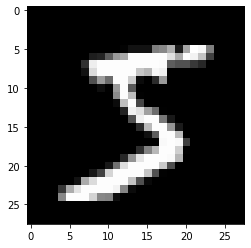

In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)
plt.gray()
plt.imshow(np.array(img))

In [0]:
img_show(img)

In [11]:
x_train.shape,t_train.shape,x_test.shape,t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [0]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [0]:
def predict(network,x):
    w1,w2,w3 = network["W1"],network["W2"],network["W3"] #重みの読み込み
    b1,b2,b3 = network["b1"],network["b2"],network["b3"] #バイアス項の読み込み


    a1 = np.dot(x ,w1) + b1; z1 = sigmoid(a1)
    a2 = np.dot(z1,w2) + b2; z2 = sigmoid(a2)
    a3 = np.dot(z2,w3) + b3; y  = softmax(a3)

    return y

# バッチ無しVer

In [28]:
x,t = get_data()
network = init_network()

acc_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p == t[i]:
        acc_cnt += 1
print("acc:" + str(float(acc_cnt)/len(x))) 

acc:0.9352


# バッチありVer

In [29]:
x,t = get_data()
network = init_network()

batch_size = 100 #バッチサイズ
acc_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis = 1)
    acc_cnt += np.sum(p==t[i:i+batch_size])
print("acc:" + str(float(acc_cnt)/len(x))) 

acc:0.9352


# 2層のニューラルネットワークの実装

In [2]:
from common.functions import *
from common.gradient import numerical_gradient

ModuleNotFoundError: ignored

In [0]:
class TwoLayerNet:
    def __init__ (self,
                  input_size,
                  hidden_size,
                  output_size,
                  weight_init_std = 0.01):
        
        self.parms = {}
        self.parms["w1"] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.parms["b1"] = np.zeros(hidden_size)
        self.parms["w2"] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.parms["b2"] = np.zeros(hidden_size)

    def predict(self,x):
        W1,W2 = self.parms["W1"],self.parms["W2"]
        b1,b2 = self.parms["b1"],self.parms["b2"]

        a1 = np.dot(x ,w1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,w2) + b2
        y = sigmoid(a2)

        return y
    
    # x:入力データ y:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)

        accuracy = np.sum(y == t)/float(x.shape[0])

    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x,t)
        grads = {}
        grads["W1"] = numerical_gradient(loss_W,self.parms["W1"])
        grads["b1"] = numerical_gradient(loss_W,self.parms["b1"])
        grads["W2"] = numerical_gradient(loss_W,self.parms["W1"])
        grads["b2"] = numerical_gradient(loss_W,self.parms["b1"])

        return grads
        

In [11]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list =[]

#ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size = 784,hidden_size = 50,output_size = 10)

for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch,t_batch)
    #grad = network.gradient(x_batch,t_batch)

    for key in ("W1","b1","W2","b2"):
        network.params[key] -= learning_rate * grad[key]

    loss = netwowk.loss(x_batch,t_batch)
    train_loss_list.append(loss)


NameError: ignored